## First exploration of the dataset of Wells:

Goal is to find a geographical zone with:
<li> a climate close to Africa
<li> a lot of datapoints in the dataset


Unfortunately, we didnt find any big enough dataset of water wells for any region in Africa, so we decided to focus our exploration on the US. We finally found a water wells dataset of 50000 datapoints in Nevada at this [address](http://water.nv.gov/mapping.aspx?mapping=Well%20Drilling%20and%20Dam%20Data)

If you look at the following map of climate in the US, you can see the climate in Nevada (right to the East of California, if you are trying to find it on the map:)
<a href="https://ibb.co/w6vrpgW"><img src="https://i.ibb.co/XJwkFLs/US-climate-map.jpg" alt="US-climate-map" border="0"></a>

The climate in Nevada is a bit of a mix between many climates, our hope here is to focus on the South of Nevada, where the weather is the most similar to Africa.

Our hope is therefore to limit our exploration of the wells dataset to a small zone of 50 km x 50km in the South of Nevada.

Let us load the dataset first:

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_6486f6925a3b4963afc058e250e1f031 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_6486f6925a3b4963afc058e250e1f031 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_6486f6925a3b4963afc058e250e1f031 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='w5_9Bf-0UAn0b7wzNtBiXwm1sCXUnaPtmOIG--k0OcV0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_6486f6925a3b4963afc058e250e1f031)

body = client_6486f6925a3b4963afc058e250e1f031.get_object(Bucket='aitofindbestwelllocation-donotdelete-pr-w1t2kzuzbwx2l0',Key='Nevada_water_wells.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

wells = pd.read_csv(body)
wells.head()


,sequence_no,well_log,app,notice_of_intent,waiver_no,date_log_rcvd,date_log_rcvd_acc,site_type,work_type,work_type_rmks,...,user_id,date_entry,update_user_id,date_update,edit_status,well_start_date,gravel_pack_top,gravel_pack_bot,utm_x,utm_y
0,67708,1,,0,,06/18/47 00:00:00,D,N,N,NaN,...,JSWINGHOLM,10/30/02 00:00:00,,NaN,F,06/09/47 00:00:00,NaN,NaN,257456.659633,4.359466e+06
1,25198,2,11209,0,,07/05/47 00:00:00,D,N,N,NaN,...,PCOOKE,10/16/95 00:00:00,dsdavis,01/29/98 00:00:00,F,04/01/47 00:00:00,0.0,0.0,669709.910372,4.004438e+06
2,28864,3,11165,0,,07/05/47 00:00:00,D,E,D,NaN,...,KCOON,07/18/96 00:00:00,user15,07/22/96 00:00:00,F,05/10/47 00:00:00,0.0,0.0,663567.760386,4.006756e+06
3,66662,4,,0,,07/07/47 00:00:00,D,N,N,NaN,...,DBRANTLEY,08/14/02 00:00:00,MDILLON,02/01/05 00:00:00,F,06/23/47 00:00:00,NaN,NaN,259411.430743,4.369189e+06
4,28852,5,11747,0,,07/10/47 00:00:00,D,N,N,NaN,...,KCOON,07/18/96 00:00:00,DBRANTLEY,02/27/08 00:00:00,F,04/01/47 00:00:00,0.0,0.0,669613.482725,4.008104e+06


In [10]:
wells.columns

Index(['sequence_no', 'well_log', 'app', 'notice_of_intent', 'waiver_no',
       'date_log_rcvd', 'date_log_rcvd_acc', 'site_type', 'work_type',
       'work_type_rmks', 'proposed_use', 'drilling_method', 'sc', 'ha', 'twn',
       'legal_twn', 'rng', 'legal_rng', 'sec', 'sec_quarters',
       'legal_quarters', 'quarters_seq', 'ref', 'latitude', 'longitude',
       'lat_long_src', 'lat_long_acc', 'owner_current', 'owner_address',
       'owner_no', 'parcel_no', 'subdivision_name', 'lot_no', 'block_no',
       'well_finish_date', 'date_cmplt_acc', 'gravel_packed', 'depth_seal',
       'depth_drilled', 'depth_bedrock', 'aquifer_desc', 'depth_cased',
       'csng_diameter', 'csng_reductions', 'top_perf', 'bottom_perf',
       'perf_intervals', 'static_wl', 'temperature', 'yield', 'drawdown',
       'hours_pumped', 'test_method', 'qual_const_data', 'qual_lith_data',
       'remarks', 'remarks_additional', 'contractor_lic_no', 'contractor_name',
       'contractor_address', 'contractor_drlr_

In [11]:
wells.loc[:30,'yield']

0        7.0
1        NaN
2        NaN
3       24.0
4        NaN
5        NaN
6       15.0
7       20.0
8        3.0
9       25.0
10      30.0
11    2500.0
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21      10.0
22       NaN
23      13.3
24       NaN
25    1350.0
26       NaN
27       NaN
28       NaN
29      24.0
30       NaN
Name: yield, dtype: float64

We take out all the NaN values in the yield column

In [12]:
wells = wells.loc[wells['yield'].notnull()]

In [13]:
wells['yield'].describe()

count    52773.00000
mean       127.10856
std        431.22692
min        -25.00000
25%         20.00000
50%         25.00000
75%         45.00000
max      10000.00000
Name: yield, dtype: float64

we still have 52773 datapoints

We also only want to keep in the dataset the best wells. In [this paper](https://www.mdpi.com/2073-4441/11/8/1596) they mention that they only work with wells with a yield bigger than 11m3/h:
<a href="https://ibb.co/nkbjXrc"><img src="https://i.ibb.co/ZTVxQd8/threshold-yield.png" alt="threshold-yield" border="0"></a>

so we will use it as a threshold too:


In [22]:
wells.loc[wells['yield'] > 11].count()


sequence_no         46280
well_log            46280
app                 46255
notice_of_intent    45690
waiver_no           46246
                    ...  
gravel_pack_top     34928
gravel_pack_bot     35165
utm_x               46271
utm_y               46271
date                43258
Length: 74, dtype: int64

In [23]:
wells = wells.loc[wells['yield'] > 11]

In [32]:
len(wells)

192

we can see that we have taken out a lot of wells, maybe we will want to lower than threshold in the future...But let's go on.

Let's have a look at the data as a map:

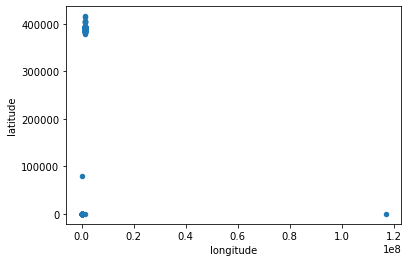

In [24]:
wells.plot(kind="scatter", x="longitude", y="latitude")

There is obviously some outlier here. Let's take it out

In [25]:
#let's get rid of the outliers
wells = wells.loc[wells.longitude < -100]

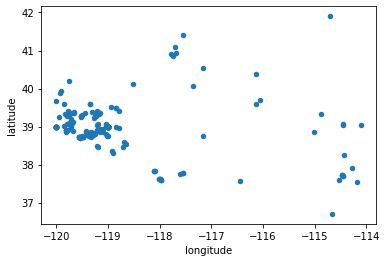

In [33]:
wells.plot(kind="scatter", x="longitude", y="latitude")

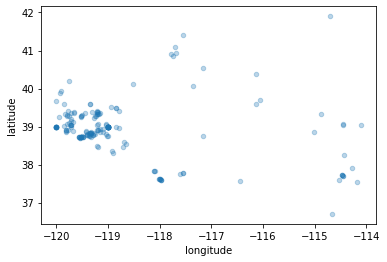

In [34]:
#Setting the alpha option to 0.3 makes it much easier to visualize the places where there is a high density of data points
wells.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3)

In order to simplify, let us only keep the column that we will work on.

In [36]:
wells = wells[['longitude', 'latitude']]

In [38]:
#remove duplicates
wells = wells.drop_duplicates()

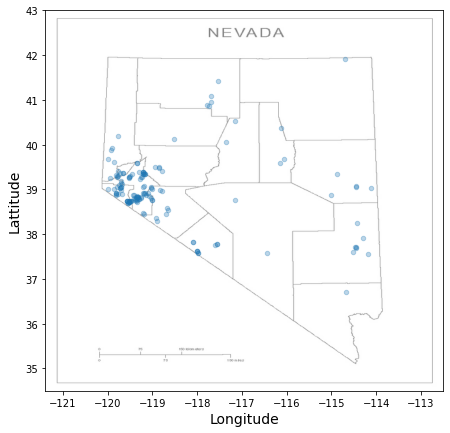

In [52]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython import display
Nevada_img=mpimg.imread('https://i.ibb.co/p1WW0XR/Nevada-blank-map.png')
ax = wells.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       colorbar=False, alpha=0.3,
                      )
plt.imshow(Nevada_img, extent=[-121.4,-112.5 , 34.5, 43],alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Lattitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()



We can see that most data points are actually in a very small zone in the South West of Nevada.

Let's compare this again to the climate map of the US:

<a href="https://ibb.co/w6vrpgW"><img src="https://i.ibb.co/XJwkFLs/US-climate-map.jpg" alt="US-climate-map" border="0"></a>

We can see that most of the wells are in an area that has a climate similar to Almaty (Kazhakstan). Which means hot summer and cold winters. 

"In Carson City, the summers are hot, arid, and mostly clear and the winters are very cold and partly cloudy. Over the course of the year, the temperature typically varies from 22°F to 89°F and is rarely below 11°F or above 96°F."


It is quite different from Africa, but given that we dont have any other dataset, we chose to do a proof of concept on this kind of climate until we find a more suitable dataset(with a climate closer to Africa).


The approximate conversions are:
Latitude: 1 deg = 110.574 km.
Longitude: 1 deg = 111.320*cos(latitude) km.

so, to get a zone of 50km x 50km we want a zone of amplitude:
<li>about 0.6 degree of longitude
<li> about 0.45 degree of latitude

In [53]:
wells.loc[(wells["longitude"] >= -120) & (wells["longitude"] <= -119) & (wells["latitude"] <= 39.4) & (wells["latitude"] >= 38.7)].count()

longitude    93
latitude     93
dtype: int64

In [54]:
wells = wells.loc[(wells["longitude"] >= -120) & (wells["longitude"] <= -119) & (wells["latitude"] <= 39.4) & (wells["latitude"] >= 38.7)]

In [55]:
#save it for next steps
wells.to_csv('small_zone_dataset_wells.csv')

Let us visualize our zone on Google Maps:

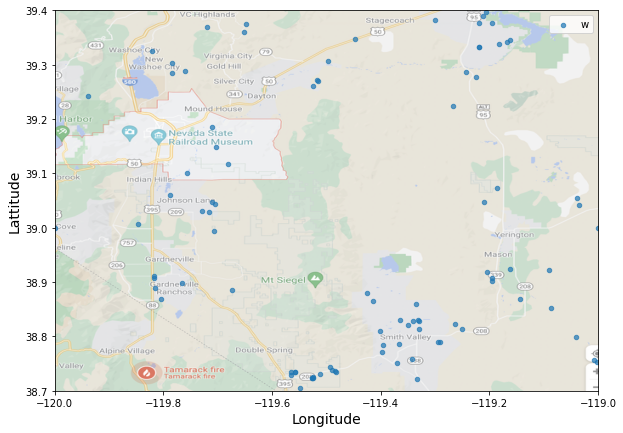

In [58]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
google_map_img=mpimg.imread('https://i.ibb.co/TBn63XR/Google-map-zone.png')
ax = wells.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       colorbar=False, alpha=0.7,
                      )
plt.imshow(google_map_img, extent=[-120,-119 , 38.7, 39.4],alpha=0.7,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Lattitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend("wells",fontsize=10)
plt.show()


**Conclusion:**

we have now limited the dataset to a small zone of about 50km x 50km (a little bit more actually, because a smaller zone would have too few datapoints we think, TODO: calculate the exact surface of our zone)

The zone into consideration is:
<li> longitude: -120 to -119
<li> latitude: 38.7 to 39.4
<li> we stay within the frontiers of Nevada, so the surface is less than the surface of the square
<li> it contains 93 "good" wells with yield >= 11

the dataset have been saved in the data folder, it can be loaded using the following command: